## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')
print(data.shape)
data

(1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.info()
# количественные - duration, amount, age
# бинарные - telephone, foreign_worker, credit_risk, people_liable
# порядковые - status, savings, employment_duration, installment_rate, present_residence, number_credits
# категориальные - credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
print(len(data[(data['age'] < 30) & (data['housing'] == 'rent')])/len(data[data['age'] < 30]) * 100)
print(len(data[(data['age'] > 40) & (data['housing'] == 'rent')])/len(data[data['age'] > 40]) * 100)

66.66666666666666
68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [6]:
len(data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))])

1

### Задание 6 (1 балл)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

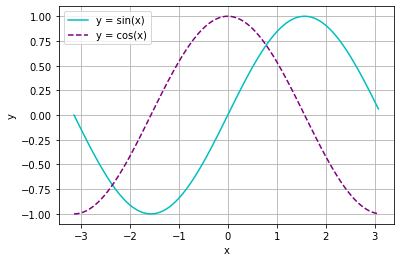

In [8]:
x = np.arange(-np.pi,np.pi,np.pi/50)
ysin = np.sin(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,ysin,'c')
ycos = np.cos(x)
plt.plot(x,ycos,'purple',ls = '--')
plt.legend(['y = sin(x)', 'y = cos(x)'])
plt.grid()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

Text(0.5, 1.0, 'Bad Risk')

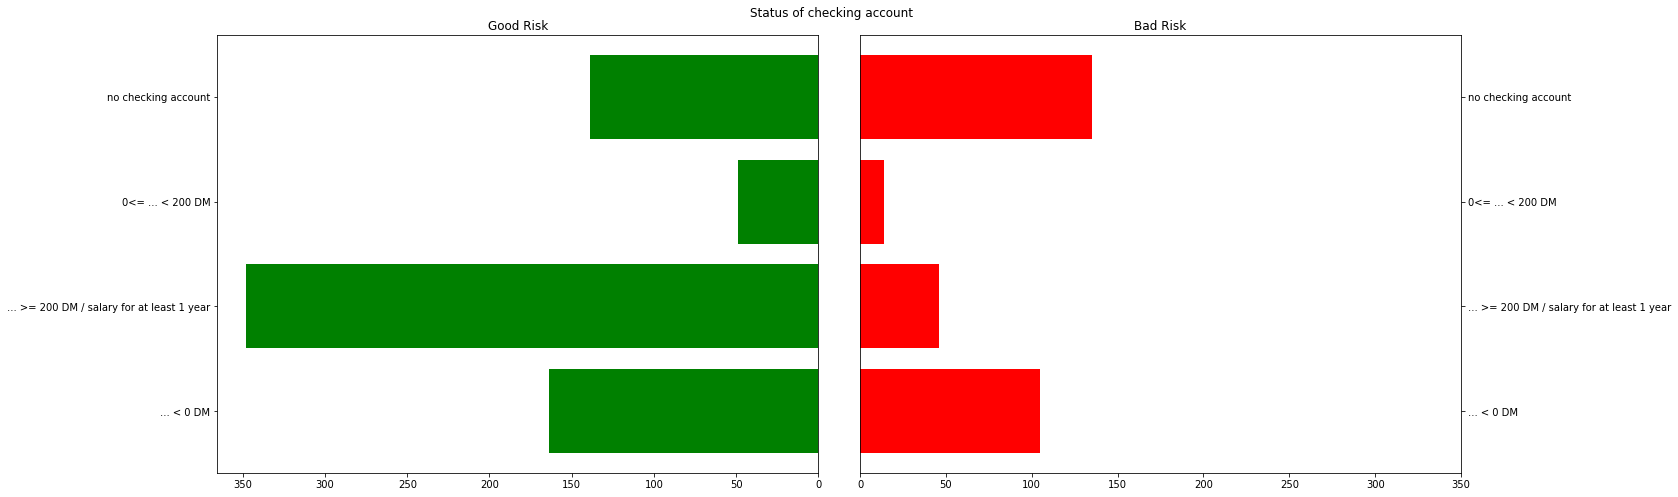

In [9]:
temp = data.groupby('status')['credit_risk'].value_counts().unstack()
fig, axes = plt.subplots(ncols=2, figsize=(18, 7))
fig.suptitle('Status of checking account')
fig.tight_layout()
plt.xlim([0, 350])
axes[0].invert_xaxis()
axes[0].set_title('Good Risk')
axes[0].barh(temp.index, temp['good'], color='g')
axes[1].barh(temp.index, temp['bad'], color='r')
axes[1].yaxis.tick_right()
axes[1].set_title('Bad Risk')
## У людей с банковским счетом и особенно у людей с большой зарплатой в течение года высокий шанс вернуть кредит

### Задание 8  (0.5 балла)

In [10]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

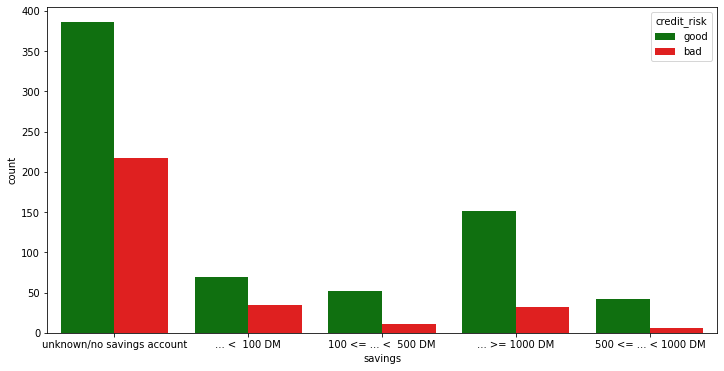

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='savings', data=data, hue = 'credit_risk', palette=['g','r'])
plt.show()
# seaborn лучше с точки восприятия и с точки написания кода
# люди с сбережениями в банке в процентном соотношении имеют больше положительных кейсов

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

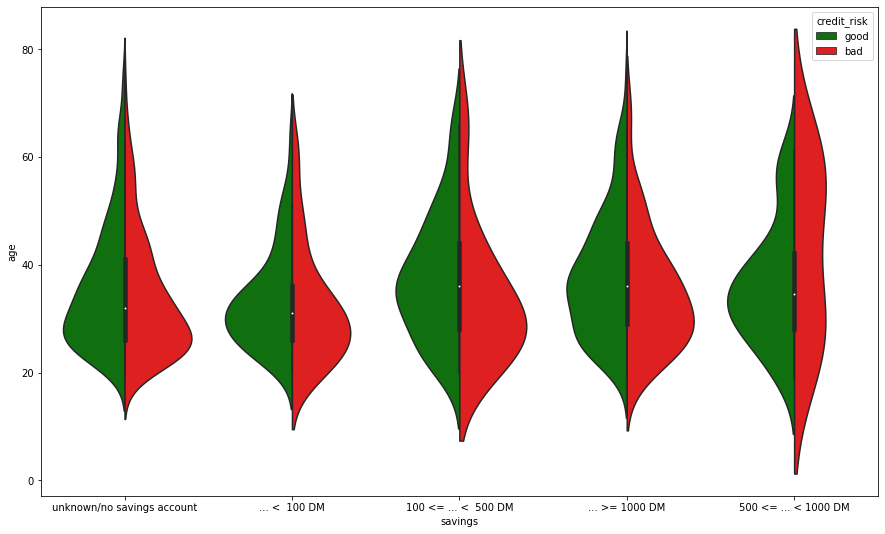

In [12]:
plt.figure(figsize=(15,9))
sns.violinplot(x='savings', y='age', data=data, hue='credit_risk', palette=['g','r'], split=True)
plt.show()
# Можно увидеть что большинство положительный кейсов, да и отрицательных относится к людям в возрасте от 20 до 45 лет,
# при том что максимум отрицательный кейсов во многих случая смешен ближе к возрасту 20 лет.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

Text(0.5, 176.30117647058825, '')

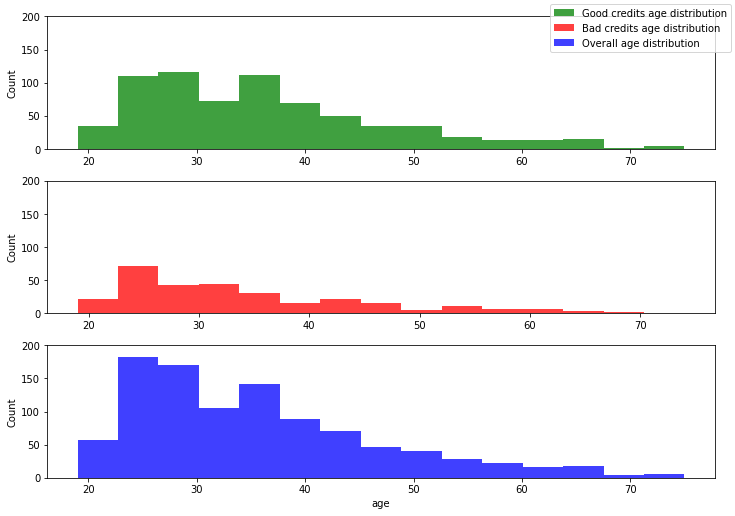

In [13]:
fig, axes = plt.subplots(nrows=3, figsize=(10, 7))
plt.rcParams['patch.edgecolor'] = 'none'
fig.tight_layout()
sns.histplot(data, x="age",  color="b",ax = axes[2], bins=15).set(ylim=(0,200))
sns.histplot(data=data[data['credit_risk'] == 'good'], x="age",color="g",ax = axes[0], bins=15).set(ylim=(0,200))
sns.histplot(data=data[data['credit_risk'] == 'bad'], x="age", color="r",ax = axes[1], bins=15).set(ylim=(0,200))
fig.legend(["Good credits age distribution", "Bad credits age distribution", "Overall age distribution"])
axes[0].set_xlabel('')
axes[1].set_xlabel('')
# Можно увидеть что большинство положительный кейсов, да и отрицательных относится к людям в возрасте от 20 до 45 лет,
# при том что максимум отрицательный кейсов во многих случая смешен ближе к возрасту 20 лет.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

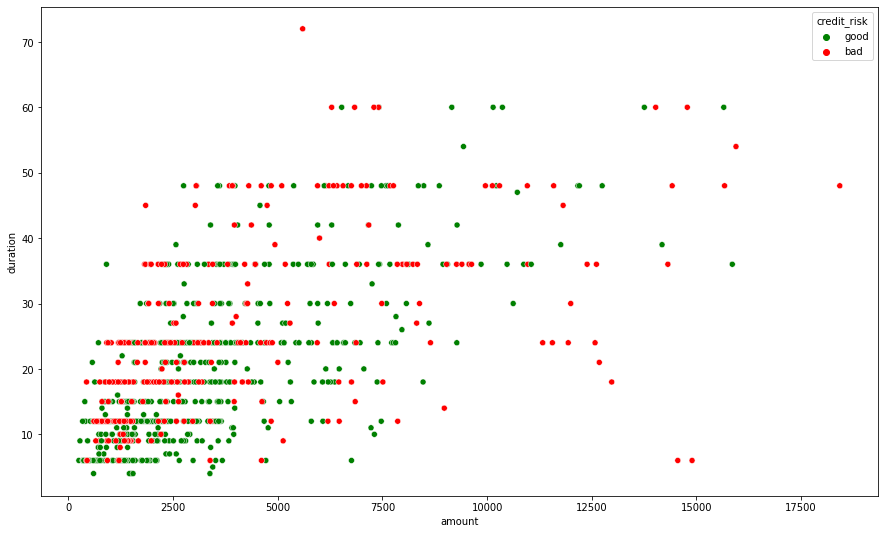

In [14]:
plt.figure(figsize=(15, 9))
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk", palette=["g", "r"])
# по графику не видно никаких зависимостей положительных и отрицательных кейсов от продолжительности и размеров кредитов
# Можно заметить, что концентрация кредитов находится в области amount (0;8000) и duration(0;45)

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

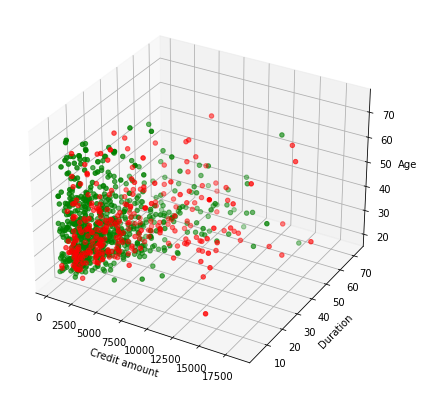

In [15]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
ax.scatter3D(data[data["credit_risk"] == "bad"]['amount'], data[data["credit_risk"] == "bad"]['duration'], data[data["credit_risk"] == "bad"]['age'], color = "red")
ax.scatter3D(data[data["credit_risk"] == "good"]['amount'], data[data["credit_risk"] == "good"]['duration'], data[data["credit_risk"] == "good"]['age'], color = "green")
# Видно что концентрация положительных и отрицательных кейсов находится в области малого размера кредита,
# малой длительности и возраста 20-40 лет

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [16]:
temp = {
    "status": {"no checking account": 0, "... < 0 DM": 1, "0<= ... < 200 DM": 2, "... >= 200 DM / salary for at least 1 year": 3},
    "savings": {"unknown/no savings account": 0, "... <  100 DM": 1, "100 <= ... <  500 DM": 2, "500 <= ... < 1000 DM": 3, "... >= 1000 DM": 4},
    "employment_duration": {"unemployed": 0, "< 1 yr": 1, "1 <= ... < 4 yrs": 2, "4 <= ... < 7 yrs": 3, ">= 7 yrs": 4},
    "installment_rate": {"< 20": 0, "20 <= ... < 25": 1, "25 <= ... < 35": 2, ">= 35": 3},
    "present_residence": {"< 1 yr": 0, "1 <= ... < 4 yrs": 1, "4 <= ... < 7 yrs": 2, ">= 7 yrs": 3},
    "number_credits": {"1": 0, "2-3": 1, "4-5": 2, ">= 6": 3}}

data["telephone"] = data["telephone"].apply(lambda x: 1 if x == "yes" else 0)
data["foreign_worker"] = data["foreign_worker"].apply(lambda x: 1 if x == "yes" else 0)
data["credit_risk"] = data["credit_risk"].apply(lambda x: 1 if x == "good" else 0)
data["people_liable"] = data["people_liable"].apply(lambda x: 1 if x == "0 to 2" else 0)
data.replace(temp, inplace=True)
data.drop(["credit_history", "purpose", "personal_status_sex", "other_debtors", "property", "other_installment_plans", "housing", "job"], axis=1, inplace=True)
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,1,0,0,1
1,0,9,2799,0,2,2,1,36,1,0,0,0,1
2,1,12,841,1,3,2,3,23,0,1,0,0,1
3,0,12,2122,0,2,1,1,39,1,0,0,1,1
4,0,12,2171,0,2,0,3,38,1,1,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [22]:
class knn:
    def __init__(self, x_train_input, y_train_input):
        self.x_train = x_train_input
        self.y_train = y_train_input
        self.k = 80
     
    def classification_function(self,nearest_neigbours_indexes):
        """
        Выбирает наиболее популярный ответ (0 или 1) среди ближайших соседей
        На вход получает индексы ближайших соседей в массиве self.x_train что совпадает с индексами self.y_train
        """
        sum = 0
        for index in nearest_neigbours_indexes:
            sum += self.y_train[index] 
        if sum >= self.k/2:
            return 1
        else:
            return 0    

    def find_distances(self, input_array):
        """
        Находит растояние от нового обьекта до обьектов обучающей выборки
        На вход получает массив признаков обьекта
        Использует np.linalg.norm для вычисления расстояний (Евклидова метрика)
        """
        distances = np.zeros(np.shape(self.x_train)[0])
        for i in range(len(self.x_train)):
            distances[i] = np.linalg.norm(self.x_train[i]-input_array)
        return distances
       
    def find_answer(self, input_array):
        """
        Собирает все функции в одно место. чтобы можно было с помощью одного метода получить предсказание по одному обьекту
        """
        distances = self.find_distances(input_array)
        nearest_neigbours_indexes = (np.argpartition(distances, self.k))[0:self.k]
        output = self.classification_function(nearest_neigbours_indexes)
        return output
    
    def predict(self, Xtest):
        """
        Выполняет предсказание по массиву обьектов
        """
        output = np.zeros(np.shape(Xtest)[0], dtype=int)
        i = 0
        for row in Xtest:
            output[i] = self.find_answer(row)
            i +=1
        return output
        
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
a = knn(X_train, y_train)
accuracy_score(y_test, a.predict(X_test))
# Используется обычный knn:
# Запоминается обучающая выборка
# При поступлении нового обьекта ищутся self.k ближайших обьектов, используя метрику Евклида
# Выдается наиболее популярный ответ среди найденных соседей



0.672